In [29]:
import pandas as pd
import numpy as np
import scipy as sp
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

In [387]:
df1= pd.read_csv("https://linked.aub.edu.lb/pkgcube/data/0050f2ea95d565d42df3600a32193531_20240905_183009.csv")
df1.head()
df1.columns.to_list()



['State of the secondary roads - good',
 'Existence of initiatives and projects  in the past five years to improve infrastructure - exists',
 'Town',
 'refArea',
 'State of the main roads - bad',
 'Observation URI',
 'The main means of public transport - vans',
 'Existence of dedicated bus stops - exists',
 'State of agricultural roads - bad',
 'publisher',
 'State of the secondary roads - acceptable',
 'State of agricultural roads - good',
 'State of the main roads - good',
 'State of the main roads - acceptable',
 'dataset',
 'State of agricultural roads - acceptable',
 'The main means of public transport - taxis',
 'The main means of public transport - buses',
 'State of the secondary roads - bad',
 'references']

In [389]:
df1.drop(['refArea', 'Observation URI', 'publisher', 'dataset', 'references'], axis=1, inplace=True)
df1.head()

,State of the secondary roads - good,Existence of initiatives and projects in the past five years to improve infrastructure - exists,Town,State of the main roads - bad,The main means of public transport - vans,Existence of dedicated bus stops - exists,State of agricultural roads - bad,State of the secondary roads - acceptable,State of agricultural roads - good,State of the main roads - good,State of the main roads - acceptable,State of agricultural roads - acceptable,The main means of public transport - taxis,The main means of public transport - buses,State of the secondary roads - bad
0,0,0,Bireh,0,0,0,1,1,0,0,1,0,1,0,0
1,0,0,A'ain El-Mir (El Establ),0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,AAridet Cheikh Zennad,1,0,0,1,0,0,0,0,0,1,0,1
3,1,0,Aaba,0,0,0,0,0,0,1,0,1,1,0,0
4,0,0,Aabadiyeh,0,0,0,1,0,0,0,1,0,1,0,1


In [541]:
bad = df1[df1["State of the main roads - bad"] == 1][[
    'Existence of dedicated bus stops - exists',
    'The main means of public transport - vans',
    'The main means of public transport - taxis',
    'The main means of public transport - buses'
]].mean()

acceptable = df1[df1["State of the main roads - acceptable"] == 1][[
    'Existence of dedicated bus stops - exists',
    'The main means of public transport - vans',
    'The main means of public transport - taxis',
    'The main means of public transport - buses'
]].mean()

good = df1[df1["State of the main roads - good"] == 1][[
    'Existence of dedicated bus stops - exists',
    'The main means of public transport - vans',
    'The main means of public transport - taxis',
    'The main means of public transport - buses'
]].mean()


Existence of dedicated bus stops - exists     0.147541
The main means of public transport - vans     0.278689
The main means of public transport - taxis    0.885246
The main means of public transport - buses    0.155738
dtype: float64

In [397]:
road_conditions = ['Bad', 'Acceptable', 'Good']

bus_availability = [bad['The main means of public transport - buses'],
                    acceptable['The main means of public transport - buses'],
                    good['The main means of public transport - buses']]

van_availability = [bad['The main means of public transport - vans'],
                    acceptable['The main means of public transport - vans'],
                    good['The main means of public transport - vans']]

taxi_availability = [bad['The main means of public transport - taxis'],
                     acceptable['The main means of public transport - taxis'],
                     good['The main means of public transport - taxis']]


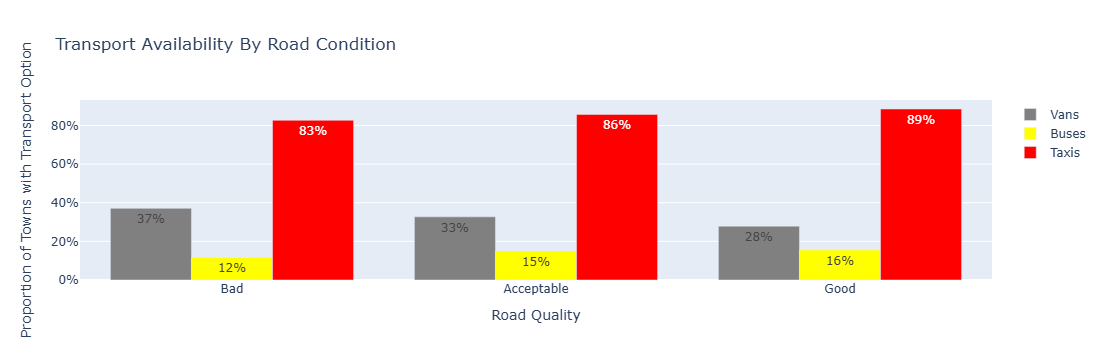

In [221]:
trace_bus = go.Bar(x=road_conditions, y=bus_availability, name="Buses", marker=dict(color="#FFFF00"),text=[f"{val * 100:.0f}%" for val in bus_availability])
trace_van = go.Bar(x=road_conditions, y=van_availability, name="Vans", marker=dict(color="#808080"), text=[f"{val * 100:.0f}%" for val in van_availability])
trace_taxi = go.Bar(x=road_conditions, y=taxi_availability, name="Taxis", marker=dict(color="#FF0000"),text=[f"{val * 100:.0f}%" for val in taxi_availability])

data = [trace_van, trace_bus, trace_taxi]
layout = go.Layout(title="Transport Availability By Road Condition",
                   xaxis=dict(title="Road Quality"),
                   yaxis=dict(title="Proportion of Towns with Transport Option", tickformat= ".0%"),
                   barmode='group')

fig = go.Figure(data=data, layout=layout)
iplot(fig)


In [399]:
main_bad = df1["State of the main roads - bad"].mean()
main_good = df1["State of the main roads - good"].mean()
main_acceptable = df1["State of the main roads - acceptable"].mean()
secondary_bad = df1["State of the secondary roads - bad"].mean()
secondary_good = df1["State of the secondary roads - good"].mean()
secondary_acceptable = df1["State of the secondary roads - acceptable"].mean()
agricultural_bad = df1["State of agricultural roads - bad"].mean()
agricultural_good = df1["State of agricultural roads - good"].mean()
agricultural_acceptable = df1["State of agricultural roads - acceptable"].mean()


summaryOfRoads = [main_bad, main_good, main_acceptable, secondary_bad, secondary_good, secondary_acceptable, agricultural_bad, agricultural_good, agricultural_acceptable]

#print(main_good, secondary_good, agricultural_good)


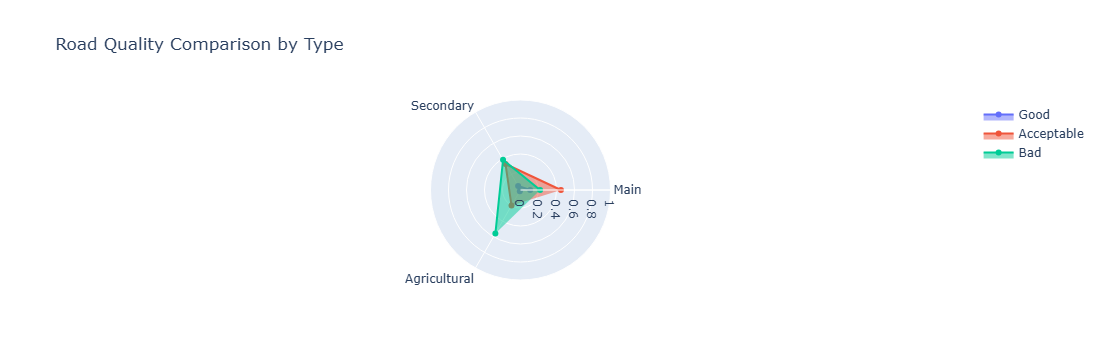

In [401]:
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    r=[main_good, secondary_good, agricultural_good],
    theta=['Main', 'Secondary', 'Agricultural'],
    fill='toself',
    name='Good'))

fig.add_trace(go.Scatterpolar(
    r=[main_acceptable, secondary_acceptable, agricultural_acceptable],
    theta=['Main', 'Secondary', 'Agricultural'],
    fill='toself',
    name='Acceptable'))

fig.add_trace(go.Scatterpolar(
    r=[main_bad, secondary_bad, agricultural_bad],
    theta=['Main', 'Secondary', 'Agricultural'],
    fill='toself',
    name='Bad'))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    title="Road Quality Comparison by Type",
    showlegend=True)
fig.show()

In [575]:
df= pd.read_csv("https://linked.aub.edu.lb/pkgcube/data/13e1689d0a84bc62e3e3a309c06956fc_20240902_120434.csv")
df.columns.to_list()

['Existence of nearby care centers - exists',
 'Existence of special needs care centers - does not exist',
 'Existence of health resources - exists',
 'Type and size of medical resources - Hospitals',
 'Existence of a first aid center - exists',
 'Town',
 'Observation URI',
 'Total number of care centers',
 'Type and size of medical resources - Clinics',
 'Existence of special needs care centers - exists',
 'Type and size of medical resources - Pharmacies',
 'Total number of first aid centers',
 'Type and size of medical resources - Labs and Radiology ',
 'references',
 'Percentage of towns with special needs indiciduals - Without special needs',
 'Percentage of towns with special needs indiciduals - With special needs',
 'refArea',
 'publisher',
 'dataset',
 'Type and size of medical resources - Medical Centers']

In [577]:
df.drop(['Observation URI','references','refArea','publisher','dataset',], axis=1,inplace= True)
df.head()

,Existence of nearby care centers - exists,Existence of special needs care centers - does not exist,Existence of health resources - exists,Type and size of medical resources - Hospitals,Existence of a first aid center - exists,Town,Total number of care centers,Type and size of medical resources - Clinics,Existence of special needs care centers - exists,Type and size of medical resources - Pharmacies,Total number of first aid centers,Type and size of medical resources - Labs and Radiology,Percentage of towns with special needs indiciduals - Without special needs,Percentage of towns with special needs indiciduals - With special needs,Type and size of medical resources - Medical Centers
0,0,1,0,0,1,Bireh,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,A'ain El-Mir (El Establ),0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,AAridet Cheikh Zennad,0,0,0,0,0,0,0,1,0
3,1,1,0,0,0,Aaba,0,0,0,0,0,0,0,1,0
4,0,1,1,0,0,Aabadiyeh,0,1,0,0,0,0,0,1,0


In [381]:
pharmacy = df[df["Type and size of medical resources - Pharmacies"]>=10]
townWithPharmacy = pharmacy["Town"]
pharmacy

,Existence of nearby care centers - exists,Existence of special needs care centers - does not exist,Existence of health resources - exists,Type and size of medical resources - Hospitals,Existence of a first aid center - exists,Town,Observation URI,Total number of care centers,Type and size of medical resources - Clinics,Existence of special needs care centers - exists,Type and size of medical resources - Pharmacies,Total number of first aid centers,Type and size of medical resources - Labs and Radiology,references,Percentage of towns with special needs indiciduals - Without special needs,Percentage of towns with special needs indiciduals - With special needs,refArea,publisher,dataset,Type and size of medical resources - Medical Centers
7,1,0,1,3,1,Aabbesiyyi,http://linked.aub.edu.lb/CODEC/Lebanon/observa...,1,3,1,25,2,4,https://impact.cib.gov.lb/home#open_data_section,0,1,http://dbpedia.org/resource/Tyre_District,Impact Open Data,http://linked.aub.edu.lb/CODEC/Lebanon/Dataset...,5
40,1,1,1,2,1,Aain Ibl,http://linked.aub.edu.lb/CODEC/Lebanon/observa...,1,1,0,15,2,5,https://impact.cib.gov.lb/home#open_data_section,0,1,http://dbpedia.org/resource/Bint_Jbeil_District,Impact Open Data,http://linked.aub.edu.lb/CODEC/Lebanon/Dataset...,2
72,0,1,1,1,0,Aamchit,http://linked.aub.edu.lb/CODEC/Lebanon/observa...,0,3,0,12,0,0,https://impact.cib.gov.lb/home#open_data_section,0,1,http://dbpedia.org/resource/Byblos_District,Impact Open Data,http://linked.aub.edu.lb/CODEC/Lebanon/Dataset...,0
95,0,1,1,1,1,Aarsal,http://linked.aub.edu.lb/CODEC/Lebanon/observa...,0,0,0,13,0,2,https://impact.cib.gov.lb/home#open_data_section,0,1,https://dbpedia.org/page/Baalbek-Hermel_Govern...,Impact Open Data,http://linked.aub.edu.lb/CODEC/Lebanon/Dataset...,0
111,0,1,1,4,1,Aaytanit,http://linked.aub.edu.lb/CODEC/Lebanon/observa...,0,3,0,15,2,2,https://impact.cib.gov.lb/home#open_data_section,0,1,http://dbpedia.org/resource/Western_Beqaa_Dist...,Impact Open Data,http://linked.aub.edu.lb/CODEC/Lebanon/Dataset...,1
120,1,0,1,2,1,Abou Qamha,http://linked.aub.edu.lb/CODEC/Lebanon/observa...,1,5,1,20,1,5,https://impact.cib.gov.lb/home#open_data_section,0,1,http://dbpedia.org/resource/Hasbaya_District,Impact Open Data,http://linked.aub.edu.lb/CODEC/Lebanon/Dataset...,0
136,1,0,1,1,1,Antelias-Naccache,http://linked.aub.edu.lb/CODEC/Lebanon/observa...,5,5,1,15,2,10,https://impact.cib.gov.lb/home#open_data_section,0,1,http://dbpedia.org/resource/Matn_District,Impact Open Data,http://linked.aub.edu.lb/CODEC/Lebanon/Dataset...,10
147,1,0,1,5,1,Baalbek,http://linked.aub.edu.lb/CODEC/Lebanon/observa...,2,5,1,48,5,5,https://impact.cib.gov.lb/home#open_data_section,0,1,https://dbpedia.org/page/Baalbek-Hermel_Govern...,Impact Open Data,http://linked.aub.edu.lb/CODEC/Lebanon/Dataset...,1
169,1,1,1,0,0,Barja,http://linked.aub.edu.lb/CODEC/Lebanon/observa...,0,3,0,14,0,4,https://impact.cib.gov.lb/home#open_data_section,0,1,https://dbpedia.org/page/Mount_Lebanon_Governo...,Impact Open Data,http://linked.aub.edu.lb/CODEC/Lebanon/Dataset...,0
171,0,0,1,2,1,Barr Elias,http://linked.aub.edu.lb/CODEC/Lebanon/observa...,0,4,1,18,2,4,https://impact.cib.gov.lb/home#open_data_section,0,1,http://dbpedia.org/resource/ZahlÃ©_District,Impact Open Data,http://linked.aub.edu.lb/CODEC/Lebanon/Dataset...,0


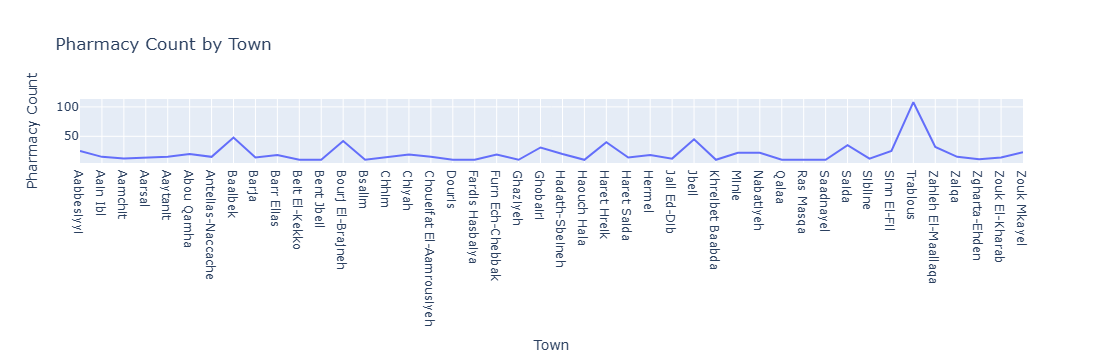

In [639]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=pharmacy["Town"],
    y=pharmacy["Type and size of medical resources - Pharmacies"],
    
    text=pharmacy["Town"],  # Hover text
    name="Pharmacy Count"
))

fig.update_layout(
    title="Pharmacy Count by Town",
    xaxis_title="Town",
    yaxis_title="Pharmacy Count",
    showlegend=False)


In [651]:
df= pd.read_csv("https://linked.aub.edu.lb/pkgcube/data/95689c3ec90ba7e4e685ced35c46b8f7_20240904_183651.csv")
df.columns.to_list()

['refArea',
 'Potable water source - water point',
 'State of the water network - good',
 'State of the water network - acceptable',
 'Potable water source - gallons purchase',
 'Potable water source - artesian well',
 'Total number of permanent water springs',
 'State of the water network - bad',
 'Observation URI',
 'references',
 'Potable water source - public network',
 'publisher',
 'Potable water source - other',
 'Town',
 'Total number of seasonal water springs',
 'dataset',
 'Total number of seasonal water points']

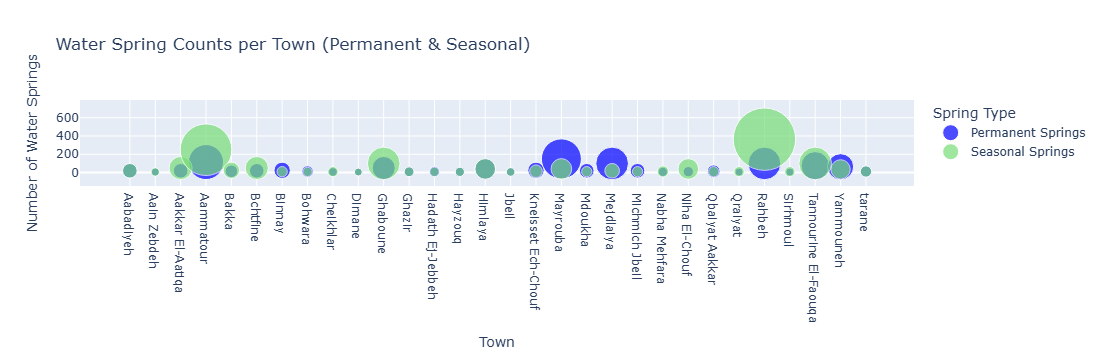

In [715]:
springs = df[(df['Total number of permanent water springs']>5) & (df['Total number of seasonal water springs']>5)]
townWithSprings = springs["Town"]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x= springs["Town"],
    y= springs['Total number of permanent water springs'],
    mode='markers',
    marker=dict(
        size=springs["Total number of permanent water springs"],
        color='blue',
        sizemode='area',
        sizeref = 2. * springs["Total number of permanent water springs"].max() / (40 ** 2)
    ),
    name='Permanent Springs'
))

fig.add_trace(go.Scatter(
    x=springs["Town"],
    y=springs["Total number of seasonal water springs"],
    mode='markers',
    marker=dict(
        size=springs["Total number of seasonal water springs"],
        color='#77DD77',
        sizemode='area',
        sizeref = 2. * springs["Total number of permanent water springs"].max() / (40 ** 2)
    ),
    name='Seasonal Springs'
))

fig.update_layout(
    title="Water Spring Counts per Town (Permanent & Seasonal)",
    xaxis_title="Town",
    yaxis_title="Number of Water Springs",
    legend_title="Spring Type"
)


In [815]:
df2= pd.read_csv("https://linked.aub.edu.lb/pkgcube/data/766496d731ca34aa96a88c60f595617f_20240906_113458.csv")
df2.columns.to_list()

['refArea',
 'Existence of educational resources - exists',
 'Type and size of educational resources - vocational institute',
 'Observation URI',
 'references',
 'publisher',
 'Existence of educational resources - does not exist',
 'Nb of universities by type - Lebanese University branches',
 'Public school coverage index (number of schools per citizen)',
 'Type and size of educational resources - public schools',
 'Type and size of educational resources - universities',
 'Town',
 'Nb of universities by type - Private universities',
 'dataset',
 'Type and size of educational resources - private schools']

In [943]:
private_schools = df2[df2['Type and size of educational resources - private schools'] > 5]
private_schools = private_schools.sort_values(by='Type and size of educational resources - private schools')

public_schools = df2[df2['Type and size of educational resources - public schools'] > 5]
public_schools = public_schools.sort_values(by='Type and size of educational resources - public schools')

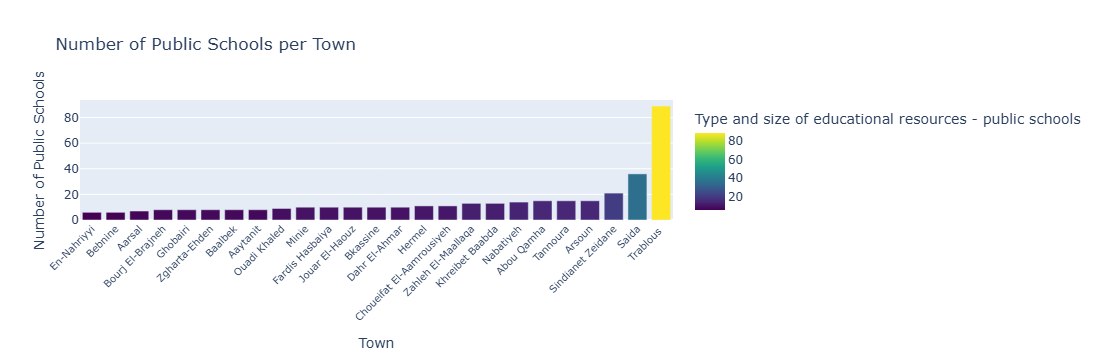

In [957]:
fig = px.bar(
    public_schools,
    x='Town',
    y='Type and size of educational resources - public schools',
    title='Public School Count By Town',
    labels={
        'Town': 'Town',
    },
    color='Type and size of educational resources - public schools',
    color_continuous_scale='Viridis',
    hover_data=["Type and size of educational resources - public schools"]
)

fig.update_layout(
    xaxis=dict(
        title="Town",
        tickangle=-45,
        tickfont=dict(size=10) 
    ),
    yaxis_title="Number of Public Schools",
    title="Number of Public Schools per Town",
    bargap=0.2
)


fig.show()

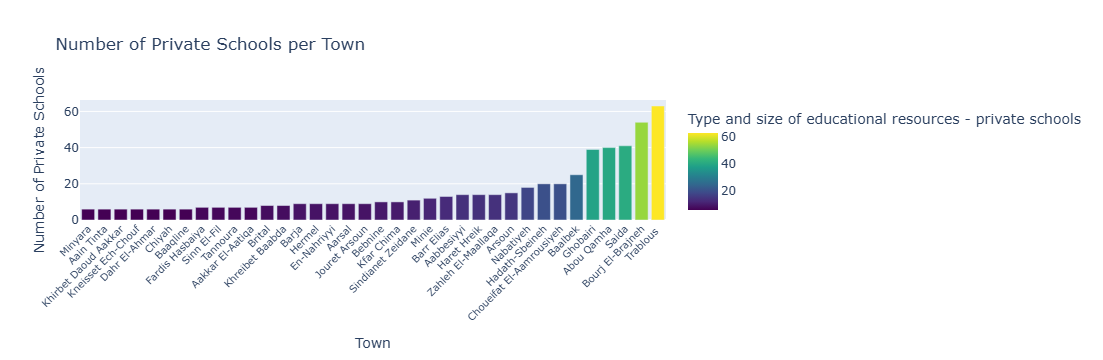

In [959]:
fig2 = px.bar(
    private_schools,
    x='Town',
    y='Type and size of educational resources - private schools',
    title='Private School Count By Town',
    labels={
        'Town': 'Town',
    },
    color='Type and size of educational resources - private schools',
    color_continuous_scale='Viridis',
    hover_data=["Type and size of educational resources - private schools"]
)

fig2.update_layout(
    xaxis=dict(
        title="Town",
        tickangle=-45,
        tickfont=dict(size=10) 
    ),
    yaxis_title="Number of Private Schools",
    title="Number of Private Schools per Town",
    bargap=0.2
)


fig2.show()